# Spam Detection Bag of Word Approach
## Do checkout Spam_Detection.ipynb for proper explanation
## In that notebook I have done proper data cleaning, analysis and analysed multiple algos for best results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head(100)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
95,spam,Your free ringtone is waiting to be collected....
96,ham,Watching telugu movie..wat abt u?
97,ham,i see. When we finish we have loads of loans t...
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...


## Encoding Labels

In [6]:
from sklearn.preprocessing import LabelEncoder
data.rename(columns={'v1':'Spam_Ham','v2':'content'},inplace=True)
data.head()

,Spam_Ham,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
le=LabelEncoder()
data['Spam_Ham']=le.fit_transform(data['Spam_Ham'])
data.head()

,Spam_Ham,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Analysing Data

In [8]:
# Check for NULL Values
data.isnull().sum()

Spam_Ham    0
content     0
dtype: int64

In [9]:
# Check for NA Values
data.isna().sum()

Spam_Ham    0
content     0
dtype: int64

In [10]:
#Check Duplicate 
data.duplicated().sum()

403

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

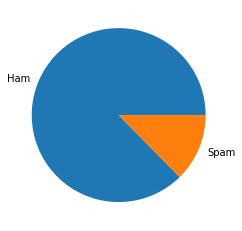

In [13]:
plt.pie(data['Spam_Ham'].value_counts(),labels=['Ham','Spam'])
plt.show()

### Looking at the data
We can clearly see the number of Spam messages are less than Ham, therefore we need a good parameter to analyse the data

### Counting Number of words,characters, sentences

In [14]:
import nltk

In [15]:
#No idea what this is but there was an error
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data['word_count']=data['content'].apply(lambda x:len(nltk.word_tokenize(x)))
data['sentence_count']=data['content'].apply(lambda x:len(nltk.sent_tokenize(x)))
data['char_count']=data['content'].apply(len)

In [17]:
data.head()

,Spam_Ham,content,word_count,sentence_count,char_count
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


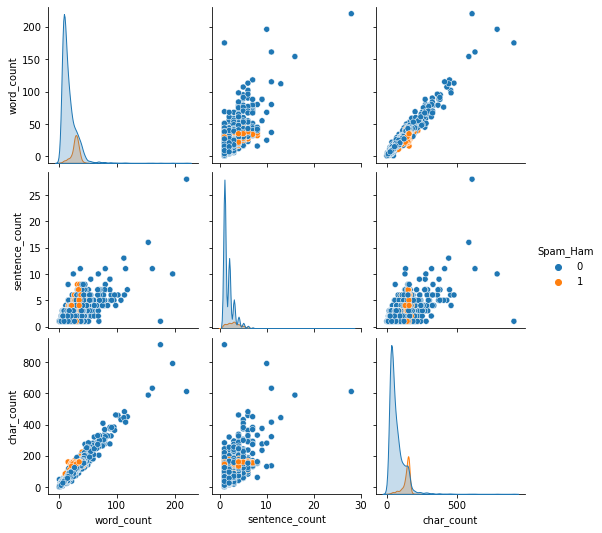

In [18]:
sns.pairplot(data,hue="Spam_Ham")

<AxesSubplot:>

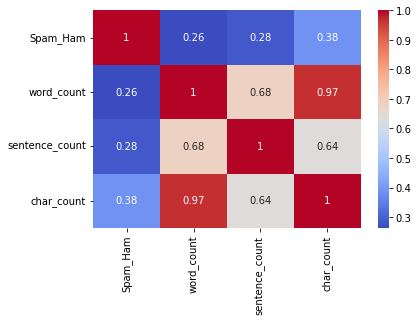

In [19]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

### We can clearly see,  that char_count is a better parameter for judgment

## Pre-Processing
Lowercasing

Tokenizing

Remove Spl Char

Stemming

Remove stop words

In [20]:
#was mentioned in official documentation.... Necessary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# this line is necessary 
from nltk.corpus import stopwords

In [22]:
import string
from nltk.stem.porter import *

In [23]:
#make a separate function to process data
def preProcessor(content):
    
    #lower case
    content=content.lower()
    
    #tokenize 
    content=nltk.word_tokenize(content)
    
    #Remove spl chars
    y=[]
    for i in content:
        if i.isalnum():
            y.append(i)
    
    
    content=y
    y=[]
    # remove stopwords : https://www.tutorialspoint.com/Removing-stop-words-with-NLTK-in-Python
    for i in content:
        if i not in stopwords.words('english') or i not in string.punctuation:
            y.append(i)
    
    
    #stemming reference:https://www.techtarget.com/searchenterpriseai/definition/stemming#:~:text=Stemming%20is%20the%20process%20of,natural%20language%20processing%20(NLP).
    content=y
    y=[]
    stemmer=PorterStemmer()
    for i in content:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [24]:
data['Processed_Text']=data['content'].apply(preProcessor)

In [25]:
data.head()

,Spam_Ham,content,word_count,sentence_count,char_count,Processed_Text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah i do think he goe to usf he live around he...


In [26]:
li=list(data[data['Spam_Ham']==1]['Processed_Text'])

In [27]:
spamWords=[]
for i in li:
    for j in i.split():
        spamWords.append(j)

In [28]:
from collections import Counter
mostComWords=pd.DataFrame(Counter(spamWords).most_common(30))
mostComWords

,0,1
0,to,595
1,a,330
2,call,320
3,you,267
4,your,252
5,free,191
6,for,183
7,the,183
8,now,164
9,or,157


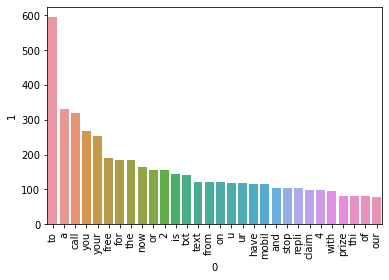

In [29]:
sns.barplot(data=mostComWords,x=0,y=1)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
li2=list(data[data['Spam_Ham']==0]['Processed_Text'])

In [31]:
hamWords=[]
for i in li2:
    for j in i.split():
        hamWords.append(j)

In [32]:
mostComHam=pd.DataFrame(Counter(hamWords).most_common(30))
mostComHam

,0,1
0,i,2688
1,you,1865
2,to,1474
3,the,1047
4,a,955
5,u,883
6,it,842
7,and,823
8,in,753
9,me,730


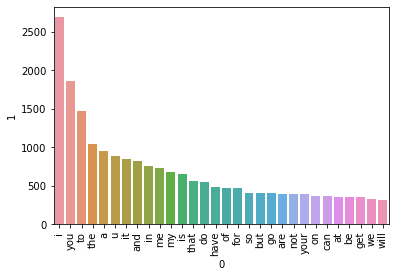

In [33]:
sns.barplot(data=mostComHam,x=0,y=1)
plt.xticks(rotation='vertical')
plt.show()

## Build Model

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cVect=CountVectorizer()
X=cVect.fit_transform(data['Processed_Text'])
X.toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
y=data['Spam_Ham'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfor=RandomForestClassifier()

In [45]:
rfor.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_rfor_pred=rfor.predict(X_test)

In [47]:
from sklearn.metrics import precision_score,accuracy_score,classification_report

In [50]:
print("Accuracy of Random Forest=",accuracy_score(y_test,y_rfor_pred))
print("Precision of Random Forest=",precision_score(y_test,y_rfor_pred))
print("Classification Report".center(40,"!"))
print(classification_report(y_test,y_rfor_pred))

Accuracy of Random Forest= 0.9680851063829787
Precision of Random Forest= 0.9912280701754386
!!!!!!!!!Classification Report!!!!!!!!!!
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.78      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [57]:
#txt="Love you babe. I am proud of you"
txt="hllo you have won 10000 dollars cash, i am king of india. click on link below to win lottery"
message=[preProcessor(txt)]
vect_inp=cVect.transform(message)

In [58]:
result=rfor.predict(vect_inp)

In [59]:
if result==1:
    print("SPAM!!!")
else:
    print("Don't worry it is Not Spam. It is a Ham Email")

SPAM!!!
